# Image Preprocessing and Augmentation
*by Marvin Bertin*
<img src="../../images/keras-tensorflow-logo.jpg" width="400">

## Scale is Driving Deep Learning Process

In recent years deep learning has become very popular both as a research field and in industry. Deep Learning is now able to solve complex tasks that were once reserved to humans. They continue to fuel breakthroughs in computer vision, natural language processing and robotics.

The basic building blocks of deep learning have been around for decades, but this type of algorithms have only really worked until recently. Two main factors have brought this field back into the spot light.

1. **computational power**
    - increased in computational power and specialized hardware (GPU clusters) makes train deep and complex models faster.
2. **large datasets**
    - large datasets are the key to achieve high performance on complex tasks.
    
    
<img src="../../images/scale.png" width="800">
    

## How to Turn Little Data to Large Data

In this lesson, we will learn how to preprocess image data for a classification task and how we can augment our dataset to increase it's size


## Deep learning for small-data problems

While deep learning performes best with large data, it is still possible to train on small dataset by using a number of tricks. Certainly, deep learning requires the ability to learn features automatically from the data, which is generally only possible when lots of training data is available, especially for problems where the input samples are very high-dimensional, like images. However, convolutional neural networks are by design one of the best models available for most "perceptual" problems (such as image classification). Training a convnet from scratch on a small image dataset will still yield reasonable results, without the need for any custom feature engineering. In addition, data augmentation can alleviate the small dataset problem.


## Data pre-processing and data augmentation

In order to make the most of our few training examples, we will "augment" our data via a number of random transformations, so that our model would never see twice the exact same picture. This helps prevent overfitting and helps the model generalize better.

In [42]:
import tensorflow as tf
import glob
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

tf_keras = tf.contrib.keras

# Image Data Generator

TF-Keras provides a class called `tf_keras.preprocessing.image.ImageDataGenerator`.

This class generates minibatches of image data with real-time data augmentation and allows you to:

- configure random transformations and normalization operations to be done on your image data during training
- instantiate generators of augmented image batches (and their labels)
- use these generators with the TF-Keras model API covered in the previous lesson


```
Arguments:
    featurewise_center: set input mean to 0 over the dataset.
    samplewise_center: set each sample mean to 0.
    featurewise_std_normalization: divide inputs by std of the
    dataset.
    samplewise_std_normalization: divide each input by its std.
    zca_whitening: apply ZCA whitening.
    rotation_range: degrees (0 to 180).
    width_shift_range: fraction of total width.
    height_shift_range: fraction of total height.
    shear_range: shear intensity (shear angle in radians).
    zoom_range: amount of zoom. if scalar z, zoom will be randomly
        picked in the range [1-z, 1+z].
    channel_shift_range: shift range for each channels.
    fill_mode: points outside the boundaries are filled
        according to the given mode ('constant', 'nearest',
        'reflect' or 'wrap').
    cval: value used for points outside the boundaries when
        fill_mode is 'constant'. Default is 0.
    horizontal_flip: whether to randomly flip images horizontally.
    vertical_flip: whether to randomly flip images vertically.
    rescale: rescaling factor. If None or 0, no rescaling is
        applied, otherwise we multiply the data by the value
        provided (before applying any other transformation).
    preprocessing_function: function that will be implied on each
        input. The function will run before any other modification
        on it.
```

# Normalize and Augment Images

In [ ]:
# load dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Turn target values into one-hot encoded vectors
y_train = np_utils.to_categorical(y_train, num_classes)
y_test = np_utils.to_categorical(y_test, num_classes)

# Normalize and augment images
datagen = ImageDataGenerator(
    featurewise_center=True,
    featurewise_std_normalization=True,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')

# Fits internal statistics based on an array of sample data. 
# Only required if featurewise_center or featurewise_std_normalization or zca_whitening.
datagen.fit(x_train)
    
# takes numpy data & label arrays, and generates batches of augmented/normalized data
# yields batches indefinitely, in an infinite loop.
datagen.flow(x = x_train, y = y_train, batch_size=32)
    
# Read images fro folder 'data/train', and indefinitely generate
# batches of augmented image data 
datagen.flow_from_directory(directory_path, target_size=(256, 256), class_mode='categorical', batch_size=32)

# Data Augmentation Example

In [43]:
# define augmentation transformations (no normalization)
datagen = tf_keras.preprocessing.image.ImageDataGenerator(
        rotation_range=40,
        width_shift_range=0.2,
        height_shift_range=0.2,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        fill_mode='nearest')

# Generate 16 Variations of the Same Image

<img src="../../images/monkey.jpg" width="400">

In [ ]:
# load to PIL image
img = tf_keras.preprocessing.image.load_img('../images/monkey.jpg')

# transform to Numpy array with shape (3, height, width)
x = tf_keras.preprocessing.image.img_to_array(img) 

# reshape to 4D tesnor with shape (1, 3, height, width)
x = x.reshape((1,) + x.shape)

# generate batches of randomly transformed images
# and saves the results to a directory
i = 0
for batch in datagen.flow(x, batch_size=1,
                          save_to_dir='../images',
                          save_prefix='monkey', save_format='jpeg'):
    i += 1
    if i > 16:
        # break generator to stop loop
        break      

# Visualize Generated Images

In [37]:
generated_images = glob.glob('../images/*.jpeg')
print("{} images generated".format(len(generated_images)))

16 images generated


In [40]:
def plot_image_grid(generated_images):
    # figure size
    fig = plt.figure(figsize=(8, 8))
    
    # load images
    images = [tf_keras.preprocessing.image.load_img(img) for img in generated_images]
    
    # plot image grid
    for x in range(4):
        for y in range(4):
            ax = fig.add_subplot(4, 4, 4*y+x+1)
            plt.imshow(images[4*y+x])
            plt.xticks(np.array([]))
            plt.yticks(np.array([]))
    plt.show()

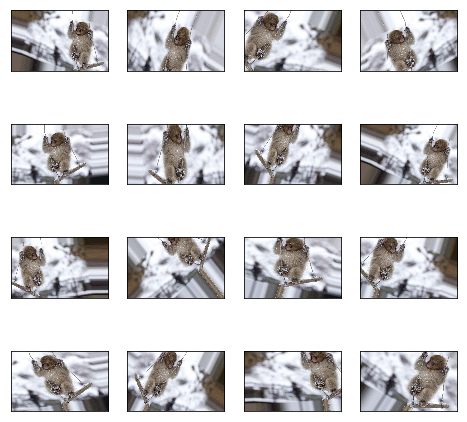

In [41]:
plot_image_grid(generated_images)

# Data Generator for Training and Testing

In [ ]:
# training data augmentation configuration
train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)

# testing data augmentation configuration with only rescaling
test_datagen = ImageDataGenerator(rescale=1./255)

# Read images fro folder 'data/train', and indefinitely generate
# batches of augmented image data 
train_generator = train_datagen.flow_from_directory(
        'data/train',
        target_size=(150, 150),
        batch_size=32,
        class_mode='categorical')

# Generate images for validation data
validation_generator = test_datagen.flow_from_directory(
        'data/validation',
        target_size=(150, 150),
        batch_size=32,
        class_mode='categorical')

# Train a Model with a Data Generator

In [ ]:
# your neural network model
model = tf_keras.models.Model(inputs=inputs, outputs=outputs)

# SGD/optimizer
optimizer = tf_keras.optimizers.SGD(lr=learning_rate)

# compile the model with loss, optimizer and evaluation metrics
model.compile(loss = tf_keras.losses.categorical_crossentropy,
              optimizer = optimizer,
              metrics = [tf_keras.metrics.categorical_accuracy])

# fits the model on batches with real-time data augmentation
# the generator is run in parallel to the model, for efficiency.
model.fit_generator(
        train_generator,
        steps_per_epoch=200,
        epochs=5,
        validation_data=validation_generator,
        validation_steps=800)

# evaluate the model on batches with real-time data augmentation
model.evaluate_generator(validation_generator, steps = 100)

# make predictions on batches with real-time data augmentation
predictions = model.predict_generator(validation_generator, steps = 100)

model.save_weights('image_classifier_iter_1.h5')

## Next Lesson
### Image Classification with VGG
-  You will learn to construct a VGG architecture and train it into an image classifier

<img src="../../images/divider.png" width="100">